In [1]:
# Project-IE590: Deep Learning for Machine Vision
# Keras Implementation of InceptionResNetV2
# Author: Varun Aggarwal`

In [1]:
# ensures back compatibility
from tensorflow.keras import backend as K

# for reading and preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# inceptionv4 model from keras with pretrained weights
from tensorflow.python.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
import tensorflow as tf
# inception_resnet_v2.InceptionResNetV2

# for plots et al.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
DATASET_PATH  = './weed_data'
IMAGE_SIZE    = (300, 300)
NUM_CLASSES   = 4
BATCH_SIZE    = 8
NUM_EPOCHS    = 20
WEIGHTS_FINAL = 'model-inception_resnet_v2-final.h5'

In [4]:
# specify data augmentation parameters for training images
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)


valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 270 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


In [5]:
# show class indices
print('****************')
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))
print('****************')

****************


NameError: name 'train_batches' is not defined

In [ ]:
# inceptionv4 - model setup
model = InceptionResNetV2(include_top=False,
                        weights='imagenet',
                        input_tensor=None,
                        input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))

In [4]:
# adding final FC layer at the end of model
x = model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense( NUM_CLASSES,
                      activation='softmax',
                      name='softmax')(x)

model = Model(inputs=model.input,
              outputs=output_layer)


# ensure all layers are trainable
for layer in model.layers:
    layer.trainable = True

# setting up optimizer for model
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [5]:
# load saved weights
model.load_weights(WEIGHTS_FINAL)

In [10]:
# train the model
hist = model.fit_generator(train_batches,
                    steps_per_epoch = train_batches.samples // BATCH_SIZE,
                    validation_data = valid_batches,
                    validation_steps = valid_batches.samples // BATCH_SIZE,
                    epochs = NUM_EPOCHS)

Epoch 1/20
33/33 [==============================] - 40s 1s/step - loss: 1.6852 - accuracy: 0.2557 - val_loss: 1.3448 - val_accuracy: 0.3750
Epoch 2/20
33/33 [==============================] - 35s 1s/step - loss: 1.3708 - accuracy: 0.4198 - val_loss: 1.1062 - val_accuracy: 0.5000
Epoch 3/20
33/33 [==============================] - 36s 1s/step - loss: 1.2287 - accuracy: 0.4733 - val_loss: 0.9164 - val_accuracy: 0.5909
Epoch 4/20
33/33 [==============================] - 35s 1s/step - loss: 0.9871 - accuracy: 0.5649 - val_loss: 0.7907 - val_accuracy: 0.6591
Epoch 5/20
33/33 [==============================] - 37s 1s/step - loss: 0.9463 - accuracy: 0.6174 - val_loss: 0.6980 - val_accuracy: 0.7045
Epoch 6/20
33/33 [==============================] - 38s 1s/step - loss: 0.8153 - accuracy: 0.6846 - val_loss: 0.6491 - val_accuracy: 0.6932
Epoch 7/20
33/33 [==============================] - 36s 1s/step - loss: 0.7656 - accuracy: 0.6832 - val_loss: 0.5470 - val_accuracy: 0.8068
Epoch 8/20
33/33 [==

In [ ]:
# save trained weights
# model.save(WEIGHTS_FINAL)

In [15]:
# Plot Results

N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

NameError: name 'hist' is not defined

In [61]:
# test model

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=1)

out = model.evaluate_generator(test_batches, use_multiprocessing=True)
print(list(zip(model.metrics_names,out)))

Found 88 images belonging to 4 classes.
[('loss', 0.43251135417069086), ('accuracy', 0.90909094)]


In [67]:
test_batches.reset()
Y_pred = model.predict_generator(test_batches, use_multiprocessing=True)
# print(len(Y_pred))



 Classification Report

              precision    recall  f1-score   support

   cocklebur       0.88      0.88      0.88        17
     foxtail       0.93      0.93      0.93        14
     pigweed       0.94      1.00      0.97        34
     ragweed       0.86      0.78      0.82        23

    accuracy                           0.91        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.91      0.91      0.91        88



Confusion Matrix



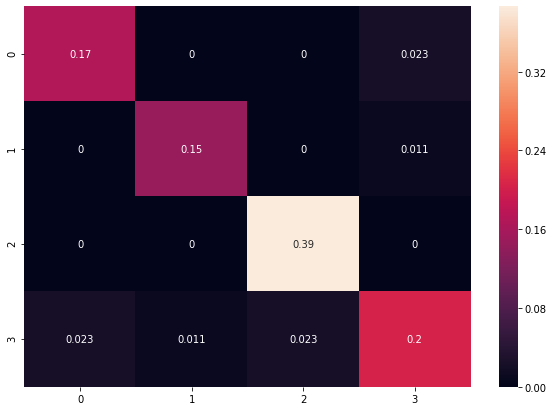

In [84]:
y_pred = np.argmax(Y_pred, axis=1)

print('\n\n Classification Report\n')
target_names = list(test_batches.class_indices.keys())
print(classification_report(list(test_batches.classes), y_pred, target_names=target_names))


print('\n\nConfusion Matrix\n')
cm = confusion_matrix(test_batches.classes, y_pred)

row_sums = cm.sum(axis=1)
new_matrix = a / row_sums[:, numpy.newaxis]

df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
# Implementation as explained in: https://arxiv.org/pdf/1602.07261v1.pdf
# Code Source: Keras InceptionResetV2 (https://jkjung-avt.github.io/keras-inceptionresnetv2/)